<a href="https://colab.research.google.com/github/valerialrc/ufv/blob/main/ELT576_AtividadePratica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELT 576 - Processamento Inteligente de Sinais
#### Professores: Leonardo B. Felix e Rodolpho V. A. Neves
## Curso de Especialização em Inteligência Computacional e Artificial
## Desafio da Semana 2

## Desafio 1: Convolução de sinais simulados

a) Um sistema linear invariante no tempo é completamente descrito por sua resposta ao impulso. Por exemplo, considere o sistema com resposta ao impulso h = [1 zeros(1,20) 0.5 zeros(1,10)]. Crie um script usando o editor e plote essa resposta ao impulso.

b) Considere a seguinte entrada no sistema x = [0 1:10 ones(1,5)*5 zeros(1,10)]. Plote esta entrada.

c) Convolua x e h, i.e., y = conv(x,h); Use o comando subplot para mostrar a resposta ao impulso, a entrada e a saída.

In [ ]:
# Importanto as bibliotecas em python
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy import signal

### Resolução da (a)

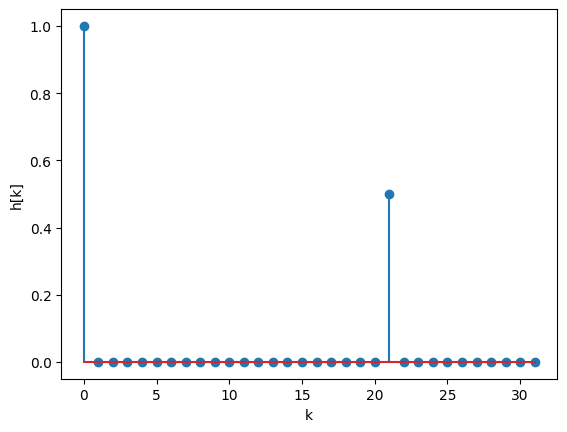

In [ ]:
#  Definindo as variaveis para resolver o problema
h = np.concatenate(([1], np.zeros(20), [0.5], np.zeros(10)))

# Plotando a serie temporal que foi criada pelos seus indices
plt.figure()
plt.stem(range(len(h)),h)
plt.xlabel("k")
plt.ylabel("h[k]")
plt.show()

In [ ]:
h.shape

(32,)

### Resolução da (b)

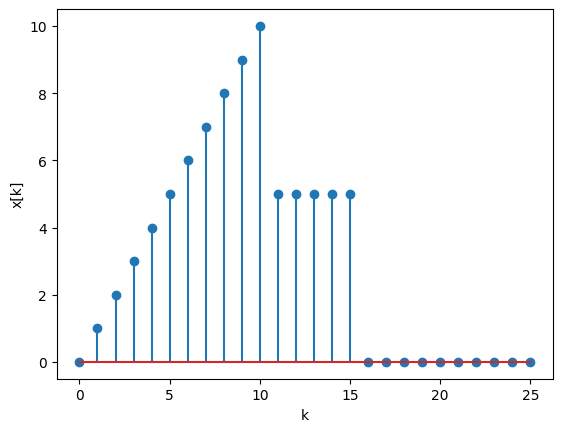

In [ ]:
# Definindo a variável do problema
x = np.concatenate(([0], range(1,11), np.ones(5)*5, np.zeros(10)))

# Plotando a serie temporal que foi criada pelos seus indices
plt.figure()
plt.stem(range(len(x)),x)
plt.xlabel("k")
plt.ylabel("x[k]")
plt.show()

### Resolução da (c)

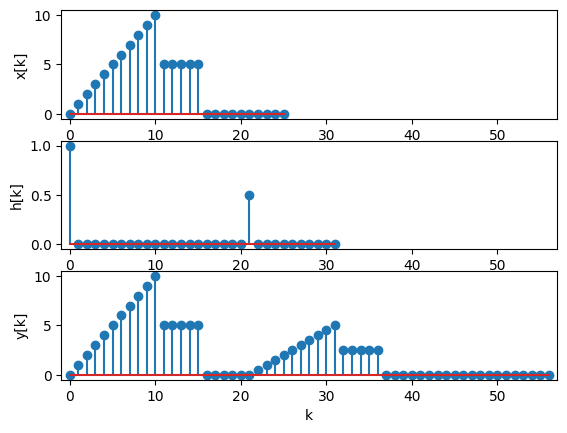

In [ ]:
# calculando a convolucao entre x e h
y = np.convolve(x,h)

# plotando os graficos da entrada, resposta ao impulso e da saida
fig, axs = plt.subplots(3,1)
axs[0].stem(range(len(x)),x)
#axs[0].xlabel("k")
axs[0].set_xlim(-1, np.max([len(x),len(y),len(h)]))
axs[0].set_ylabel("x[k]")

axs[1].stem(range(len(h)),h)
axs[1].set_xlim(-1, np.max([len(x),len(y),len(h)]))
axs[1].set_ylabel("h[k]")

axs[2].stem(range(len(y)),y)
axs[2].set_xlim(-1, np.max([len(x),len(y),len(h)]))
axs[2].set_xlabel("k")
axs[2].set_ylabel("y[k]")

plt.show()

## Desafio 2: Resposta ao impulso quadrado

Faça o download do arquivo *trumpet.mat* no PVAnet moodle e plote-o. O sinal está em trumpet.y e a frequência de amostragem em trumpet.Fs. Crie uma resposta ao impulso quadrada h2 = [ones(1,50)/50 zeros(1,20)].

a) Gere um novo sinal y2 convoluindo trumpet com h2.

b) Olhe e ouça os sinais. O sinal convoluído parece mais "suave"? Um sistema que possui resposta ao impulso de acordo com h2 é um filtro passa-baixa. Como a entrada é constituída de várias componentes de frequência diferentes - veremos mais sobre isso no próximo módulo - as componentes de alta-frequência da entrada são atenuadas ao se realizar a convolução com sistemas do tipo de
h2. O que acontece se alterar o número de uns e zeros de h2?

In [ ]:
# importando as bibliotecas para resolver o exercicio
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy import io as sio

### Resolução da (a)

In [ ]:
# carregando o arquivo trumpet.mat do github

user = "nias-ufv"
repo = "elt576-processamento-inteligente-sinais"
diretorio = "semana-2"
arquivo = "trumpet.mat"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{diretorio}/{arquivo}"
!wget --no-cache --backups=1 {url}

print("Arquivo carregado com sucesso! Confira o diretório de trabalho atual.")

--2025-01-23 23:21:56--  https://raw.githubusercontent.com/nias-ufv/elt576-processamento-inteligente-sinais/main/semana-2/trumpet.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75434 (74K) [application/octet-stream]
Failed to rename trumpet.mat to trumpet.mat.1: (2) No such file or directory
Saving to: ‘trumpet.mat’

trumpet.mat         100%[===================>]  73.67K  --.-KB/s    in 0.02s   

2025-01-23 23:21:56 (3.12 MB/s) - ‘trumpet.mat’ saved [75434/75434]

Arquivo carregado com sucesso! Confira o diretório de trabalho atual.


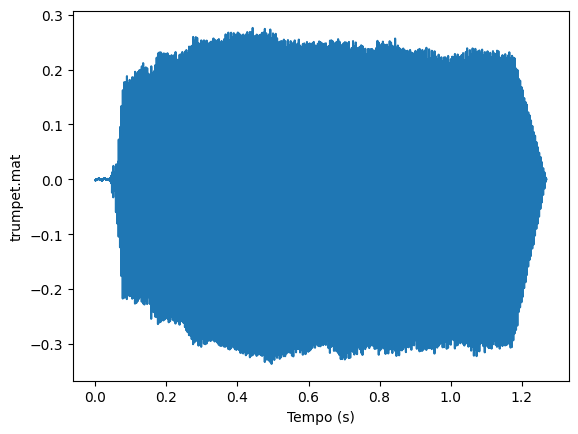

In [ ]:
# lendo o arquivo .mat com a biblioteca scipy.io
trumpet = sio.loadmat("trumpet.mat")
Fs = trumpet['Fs'][0,0] # para extrair o valor do vetor e carregar ele como constante
Ts = 1/Fs
trumpet_y = trumpet['y'][:,0] # para extrair o vetor como 1D
t = np.linspace(0, (len(trumpet_y)-1)*Ts, len(trumpet_y))

# plotando o sinal pelo tempo
plt.plot(t, trumpet_y)
plt.ylabel("trumpet.mat")
plt.xlabel("Tempo (s)")
#plt.xlim(0.3,0.4)
plt.show()

In [ ]:
Fs

22050

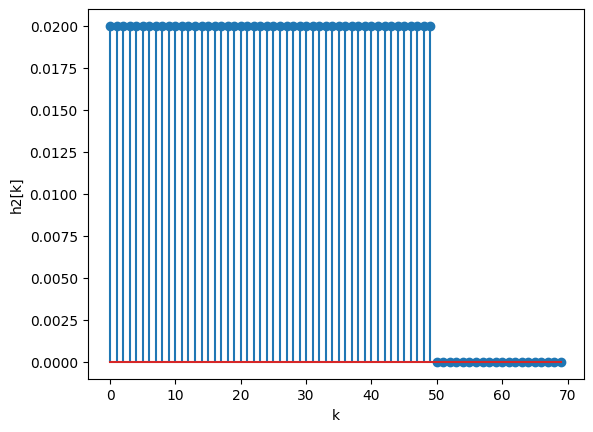

In [ ]:
# criando a resposta ao impulso h2

h2 = np.concatenate((np.ones(50)/50, np.zeros(20)))

# Plotando a serie temporal que foi criada pelos seus indices
plt.figure()
plt.stem(range(len(h2)),h2)
plt.xlabel("k")
plt.ylabel("h2[k]")
plt.show()

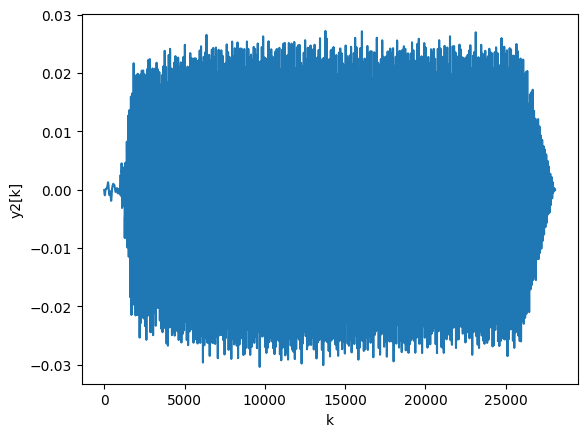

In [ ]:
# convoluindo trumpet.mat com o sinal h2

y2 = np.convolve(trumpet_y, h2)

plt.plot(y2)
plt.xlabel("k")
plt.ylabel("y2[k]")
plt.show()

### Resolução da (b)

In [ ]:
# biblioteca para tocar audio no python (Google Colab)
from IPython.display import Audio

In [ ]:
# tocando o som trumpet.wav
Audio(trumpet_y,rate=Fs)

In [ ]:
# tocando o som da convolucao de trumpet.wav e h2
Audio(y2,rate=Fs)

Repare que o segundo som sai mais "abafado". Se você reparar bem nas figuras dos sinais (original e o convoluído com a resposta ao impulso h2) vai ver que o sinal convoluído tem menos preenchimento. Repare também que o sinal está com amplitude menor do que o sinal original.

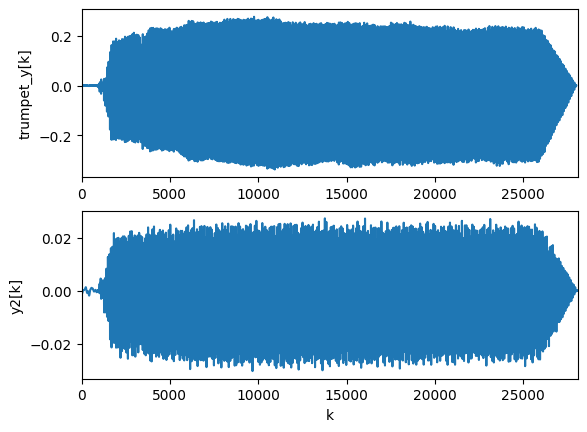

In [ ]:
# plotando os graficos dos dois sinais
fig, axs = plt.subplots(2,1)
axs[0].plot(range(len(trumpet_y)),trumpet_y)
#axs[0].xlabel("k")
axs[0].set_xlim(0, np.max([len(trumpet_y),len(y2)]))
#axs[0].set_ylim(-0.3, 0.3)
axs[0].set_ylabel("trumpet_y[k]")

axs[1].plot(range(len(y2)),y2)
axs[1].set_xlim(0, np.max([len(trumpet_y),len(y2)]))
#axs[1].set_ylim(-0.3, 0.3)
axs[1].set_xlabel("k")
axs[1].set_ylabel("y2[k]")
plt.show()

## Desafio 3: Realce de imagens lunares

Uma imagem representa um sinal bidimensional. A Figura 1 mostra o processo de
formação e representação da uma imagem digital de um objeto qualquer na cena de observação.

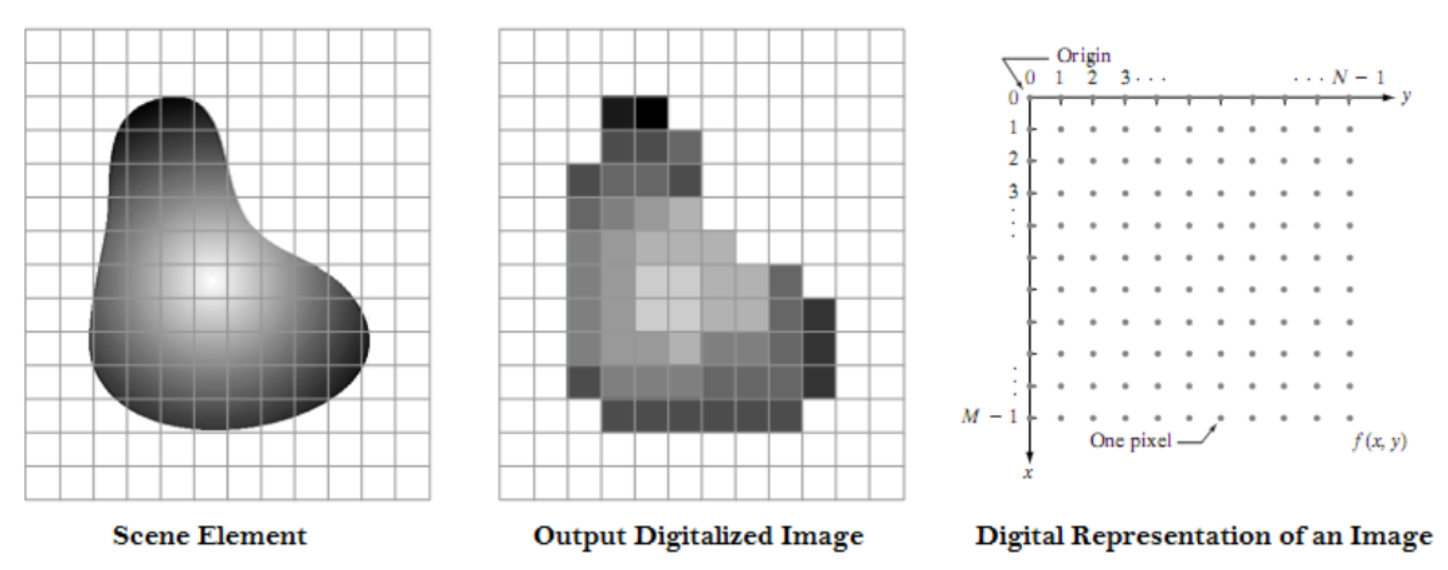

Figura 1: Processo de formação e de representação de uma imagem discreta.

A convolução pode ser usada para atenuar ou realçar características. Para verificar, faça o download da imagem "lua.jpg" no PVAnet moodle e carregue no computador e exiba a imagem usando escala de cinza de 8 bits. Faça um realce nos detalhes da imagem. Para isto, use o kernel (descrito por um filtro de Laplace) dado por

$$F = \begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1\end{bmatrix}$$

e faça a convolução desse kernel com a imagem 1 usando conv2 (convolve no Python). Por fim, faça a soma da imagem convoluída com a imagem original. Discuta os resultados de cada etapa do processamento da imagem lunar e quais as características foram realçadas.

In [ ]:
# carregando o arquivo lua.jpg do github

user = "nias-ufv"
repo = "elt576-processamento-inteligente-sinais"
diretorio = "semana-2"
arquivo = "lua.jpg"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{diretorio}/{arquivo}"
!wget --no-cache --backups=1 {url}

print("Arquivo carregado com sucesso! Confira o diretório de trabalho atual.")

--2025-01-23 23:22:05--  https://raw.githubusercontent.com/nias-ufv/elt576-processamento-inteligente-sinais/main/semana-2/lua.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55022 (54K) [image/jpeg]
Failed to rename lua.jpg to lua.jpg.1: (2) No such file or directory
Saving to: ‘lua.jpg’

lua.jpg             100%[===================>]  53.73K  --.-KB/s    in 0.01s   

2025-01-23 23:22:06 (4.17 MB/s) - ‘lua.jpg’ saved [55022/55022]

Arquivo carregado com sucesso! Confira o diretório de trabalho atual.


In [ ]:
# bibliotecas para carregar imagem OpenCV
!pip install opencv-python

In [ ]:
# importando a biblioteca do opencv
import cv2

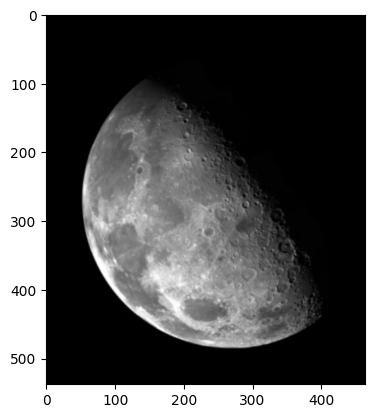

In [ ]:
# carregando a imagem
img = cv2.imread('lua.jpg')
plt.imshow(img, cmap='gray')
plt.show()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
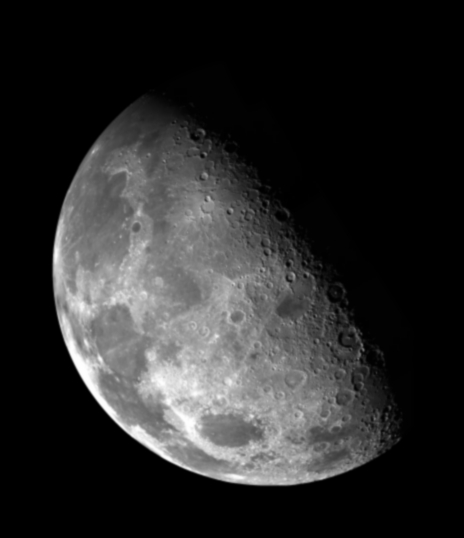

In [ ]:
img

Repare que a imagem é carregada como uma matriz de 3 dimensões: linha, coluna e camadas de cores (red, green, blue - RGB). Vamos precisar converter ela para escala de cinza.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
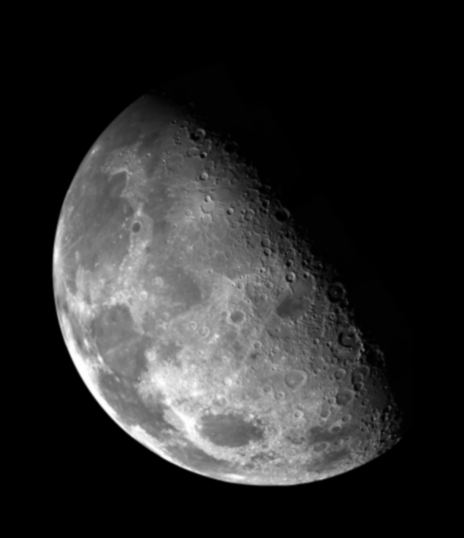

In [ ]:
# convertendo para escala de cinza
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gs

In [ ]:
# definindo o filtro dado no desafio
F = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
F

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

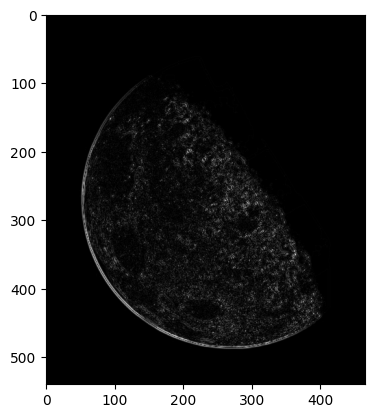

In [ ]:
# convoluindo a img_gs com F
from scipy import signal

img_conv = signal.convolve2d(img_gs, F)
plt.imshow(np.absolute(img_conv), cmap='gray')
plt.show()

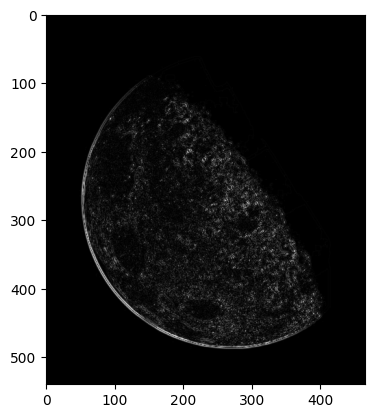

In [ ]:
# carregando a biblioteca scipy para fazer a convolucao da imagem
from scipy import signal

# convoluindo a img_gs com F
img_conv = signal.convolve2d(img_gs, F)

# convertendo todos os pontos para uma escala de cinza de 8 bits, como a figura anterior
img_conv = np.array(np.absolute(img_conv), dtype='uint8')
plt.imshow(img_conv, cmap='gray')
plt.show()

In [ ]:
img_gs.shape

(538, 464)

In [ ]:
F.shape

(3, 3)

In [ ]:
img_conv.shape

(540, 466)

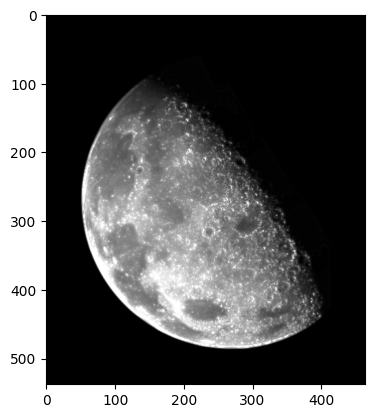

In [ ]:
img_resized = cv2.resize(img_conv, img_gs.T.shape) # a entrada para o resize e invertida do shape
# como um valor de 8 bits so conta ate 255, precisamos somar as imagens com uma funcao que nao excede a soma de 255
img_somada = cv2.add(img_gs.astype('uint8'), img_resized)

plt.imshow(img_somada, cmap='gray')
plt.show()

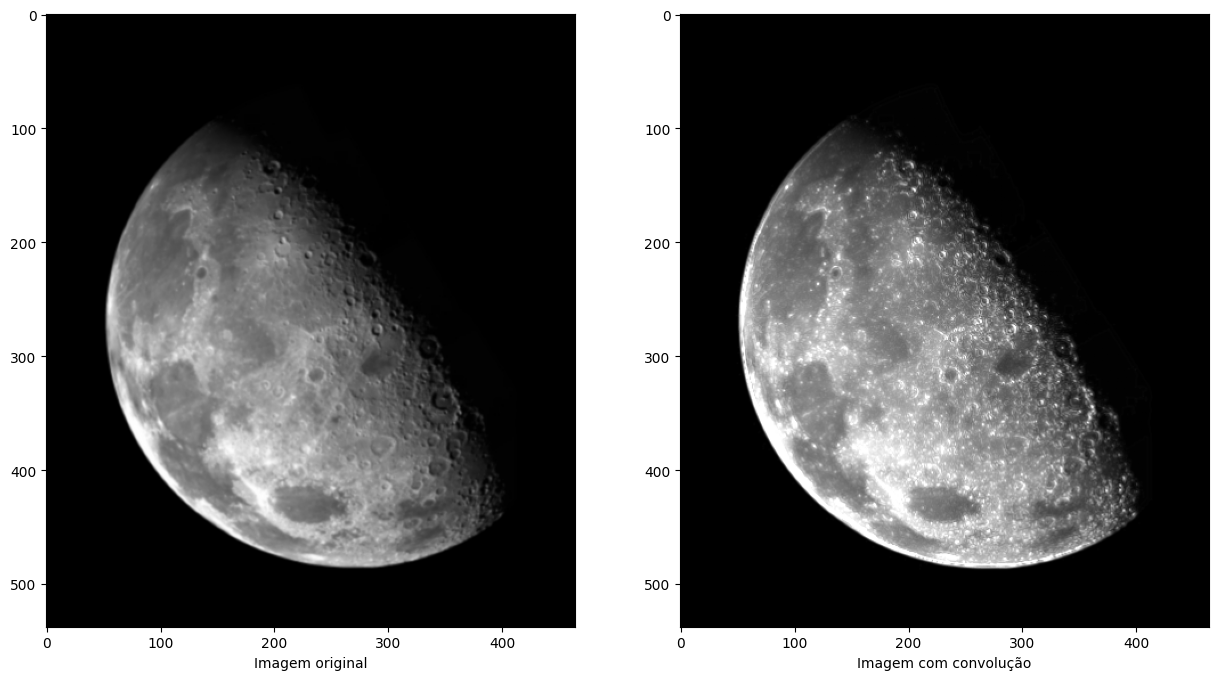

In [ ]:
# plotando as imagem original e a convoluida
fig, axs = plt.subplots(1,2)

fig.set_figwidth(15)
fig.set_figheight(10)
axs[0].imshow(img)
axs[0].set_xlabel("Imagem original")

axs[1].imshow(img_somada, cmap='gray')
axs[1].set_xlabel("Imagem com convolução")
plt.show()

## Desafio 4: Que filtro é esse?

Faça o download da imagem "texto.jpg" no PVAnet moddle, carregue-a e utilize um kernel F para convoluir. Utilize
$$ F = \frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1  \end{bmatrix}.$$

Discuta o resultado e pesquise sobre esse tipo de filtro.

In [ ]:
# importando as bibliotecas
import numpy as np
from scipy import signal

In [ ]:
# baixando a imagem do github da disciplina

user = "nias-ufv"
repo = "elt576-processamento-inteligente-sinais"
diretorio = "semana-2"
arquivo = "texto.jpg"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{diretorio}/{arquivo}"
!wget --no-cache --backups=1 {url}

print("Arquivo carregado com sucesso! Confira o diretório de trabalho atual.")

--2025-01-23 23:22:21--  https://raw.githubusercontent.com/nias-ufv/elt576-processamento-inteligente-sinais/main/semana-2/texto.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86055 (84K) [image/jpeg]
Failed to rename texto.jpg to texto.jpg.1: (2) No such file or directory
Saving to: ‘texto.jpg’

texto.jpg           100%[===================>]  84.04K  --.-KB/s    in 0.02s   

2025-01-23 23:22:21 (3.74 MB/s) - ‘texto.jpg’ saved [86055/86055]

Arquivo carregado com sucesso! Confira o diretório de trabalho atual.


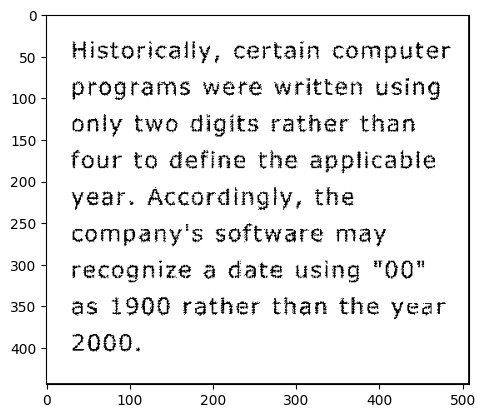

In [ ]:
texto = cv2.imread("texto.jpg")
texto = cv2.cvtColor(texto,cv2.COLOR_BGR2GRAY)
plt.imshow(np.absolute(texto), cmap='gray')
plt.show()

In [ ]:
# definindo o filtro dado no desafio
F = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])*1/9
F

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

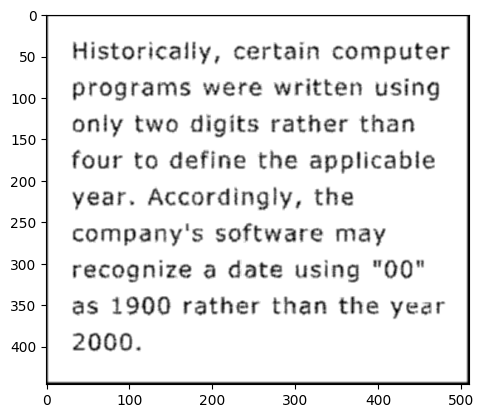

In [ ]:
# fazendo a convolucao
texto_conv = signal.convolve2d(texto,F)
plt.imshow(np.absolute(texto_conv), cmap='gray')
plt.show()

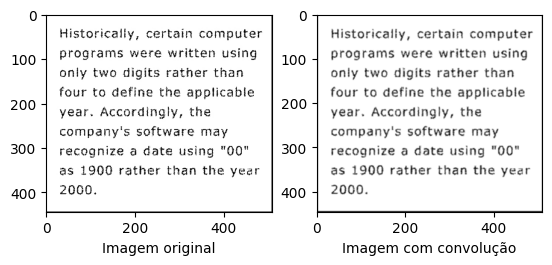

In [ ]:
# plotando as imagem original e a convoluida
fig, axs = plt.subplots(1,2)

axs[0].imshow(texto, cmap='gray')
axs[0].set_xlabel("Imagem original")

axs[1].imshow(np.absolute(texto_conv), cmap='gray')
axs[1].set_xlabel("Imagem com convolução")
plt.show()

O filtro F em questão faz uma suavização no conteúdo das mensagens, deixando os pixels das letras gradativamente indo do branco para o preto, em uma escala de cinza.

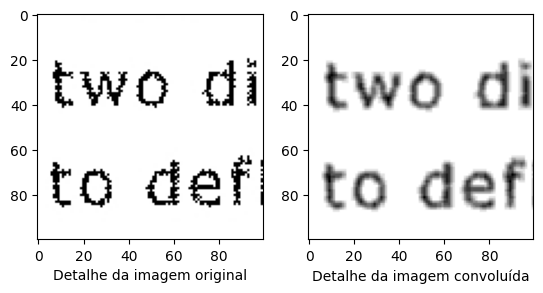

In [ ]:
# plot do detalhe da figura
# plotando as imagem original e a convoluida
fig, axs = plt.subplots(1,2)

axs[0].imshow(texto[100:200, :][:, 100:200], cmap='gray')
axs[0].set_xlabel("Detalhe da imagem original")

axs[1].imshow(texto_conv[100:200, :][:, 100:200], cmap='gray')
axs[1].set_xlabel("Detalhe da imagem convoluída")
plt.show()